In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pmdarima import auto_arima
from datetime import datetime

Airline Example

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
df.columns = ['Passengers']
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


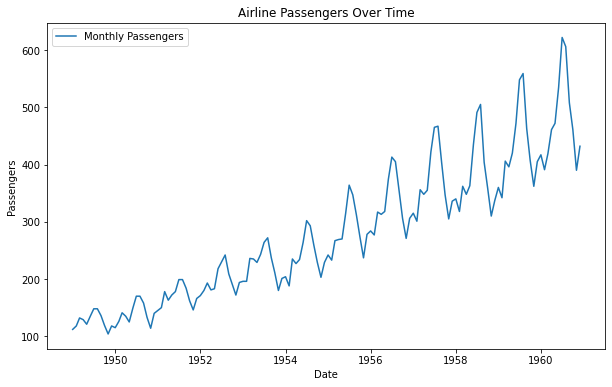

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(df, label='Monthly Passengers')
plt.title('Airline Passengers Over Time')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

In [4]:
train = df.iloc[:-24]
test = df.iloc[-24:]

In [5]:
model = auto_arima(
    train['Passengers'],
    seasonal=True,          # <<<<< This is the key change
    trace=True,  
    m=12,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=813.748, Time=1.58 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=910.236, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=810.646, Time=0.41 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=860.575, Time=0.28 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1060.479, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=809.411, Time=0.05 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=810.721, Time=0.29 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=812.509, Time=0.86 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=808.863, Time=0.08 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=810.482, Time=0.49 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=810.553, Time=0.30 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(3,0,0)(0,1,0)[12] intercept   : AIC=809.375, Time=0.12 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=809.672, Time=0.11 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept  

In [6]:
n_periods = 24
forecast = model.predict(n_periods=n_periods)

In [7]:
forecast_index = pd.date_range(start=train.index[-1] + pd.offsets.MonthBegin(), periods=n_periods, freq='MS')
forecast_series = pd.Series(forecast, index=forecast_index)

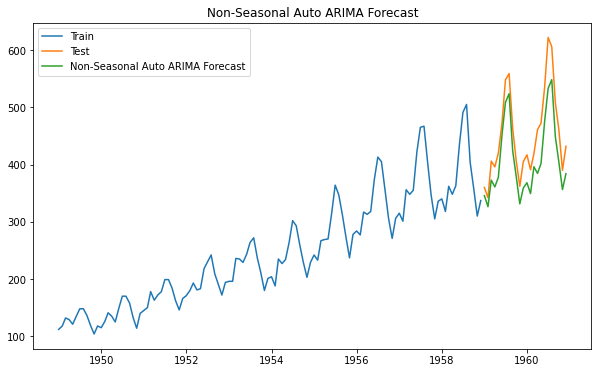

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index, test['Passengers'], label='Test')
plt.plot(forecast_series.index, forecast_series, label='Non-Seasonal Auto ARIMA Forecast')
plt.legend()
plt.title("Non-Seasonal Auto ARIMA Forecast")
plt.show()